In [1]:
import pandas as pd 
from data_preprocessing import (
    preprocess_data,
    TARGET_VALUE_COLUMN,
    RANDOM_SEED,
    encode_data,
    get_X_y_split
)
from pydantic import FilePath
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from typing import Any 
from sklearn.metrics import f1_score
import pickle


/tmp/ipykernel_403429/3179311977.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("dataset_6/TCGA_GBM_LGG_Mutations_all.csv")
data = preprocess_data(data)

In [3]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED, stratify=data[TARGET_VALUE_COLUMN])

# Labels distribution in train and test 

<Axes: title={'center': 'Test data'}, xlabel='Grade'>

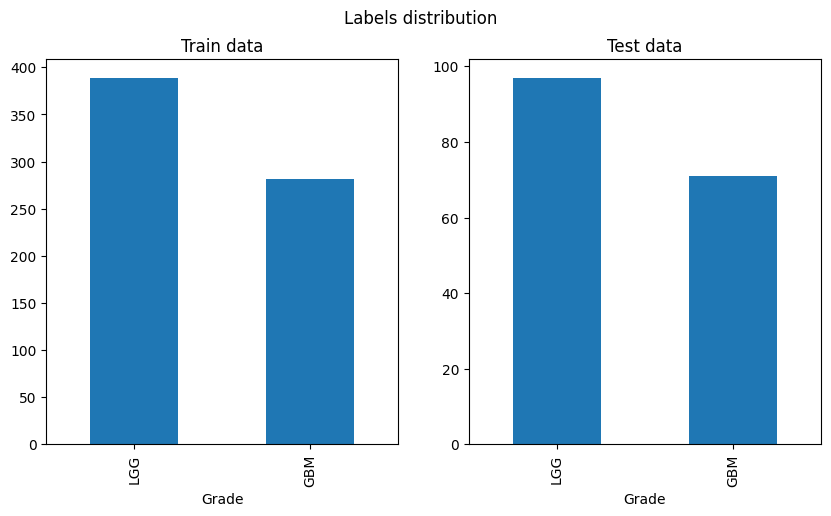

In [4]:
fig, (train_data_ax, test_data_ax) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Labels distribution")
train_data_ax.set_title("Train data")
test_data_ax.set_title("Test data")
train_data["Grade"].value_counts().plot.bar(ax=train_data_ax)
test_data["Grade"].value_counts().plot.bar(ax=test_data_ax)

In [5]:
def get_model_f1_score(model, test_x, test_y) -> float:
    prediction = model.predict(test_x)
    f1 = f1_score(y_true=test_y, y_pred=prediction)
    return f1 

encoded_train = encode_data(train_data)
train_x, train_y = get_X_y_split(encoded_train)

encoded_test = encode_data(test_data)
test_x, test_y = get_X_y_split(encoded_test) 

# Train decision tree classifier

In [6]:
dtree_cls = DecisionTreeClassifier(random_state=RANDOM_SEED)
dtree_cls.fit(train_x, train_y)
f1 = get_model_f1_score(dtree_cls, test_x, test_y)
f1


1.0

# Train Logistic Regression

In [7]:
log_reg_cl = LogisticRegression(random_state=RANDOM_SEED)
log_reg_cl.fit(train_x, train_y)
f1 = get_model_f1_score(log_reg_cl, test_x, test_y)
f1

/home/andrey/AS/ITMO/MLServicesProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

# Train Random Forest 

In [8]:
random_forest_cls = RandomForestClassifier(random_state=RANDOM_SEED)
random_forest_cls.fit(train_x, train_y)
f1 = get_model_f1_score(random_forest_cls, test_x, test_y)
f1

1.0

# Save models

In [9]:
def dump_pickle_at_path(path: FilePath, data: Any) -> None:
    with open(path, "wb") as f:
        pickle.dump(data, f) 

dump_pickle_at_path(path="models/random_forest.pkl", data=random_forest_cls)
dump_pickle_at_path(path="models/log_reg.pkl", data=log_reg_cl)
dump_pickle_at_path(path="models/dtree.pkl", data=dtree_cls)